### 멜론차트 top100 음원데이터 수집
- 가수명,곡명 데이터 수집
- 가수명, 곡명 딕셔너리로 정리
- pandas 를 이용해서 dataFrame 으로 생성
- dataframe 엑셀팡일로 저장


In [7]:
#환경셋팅
#html요청
# 선택자 접근
# header
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
header = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.5304.122 Safari/537.36'}

In [8]:
#멜론 > 멜론차트 > top100
#url 가져오기
url ='https://www.melon.com/chart/index.htm'
# html 요청하고 파이썬 객체로 변환
res = req.get(url,  headers = header)
res # html 정보 잘 응답된 상태
html =bs(res.text, 'lxml')
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

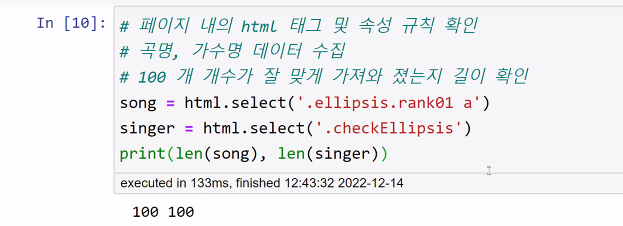
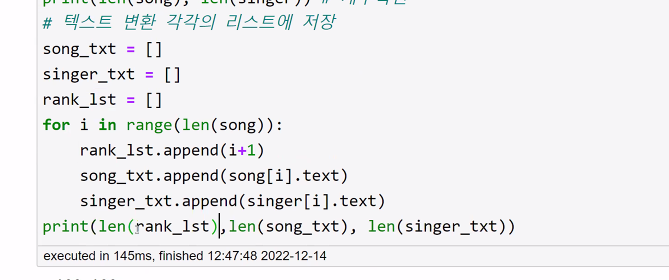

In [11]:
# song
song = html.select('.ellipsis.rank01 a')
singer = html.select('.checkEllipsis')
print(len(song), len(singer))

song_txt = []
singer_txt = []
rank_lst =[]

for i in range(len(song)):
    rank_lst.append(i+1)
    song_txt.append(song[i].text)
    singer_txt.append(singer[i].text)
print(len(rank_lst),len(song_txt),len(singer_txt))

100 100
100 100 100


#### 데이터 프레임 생성


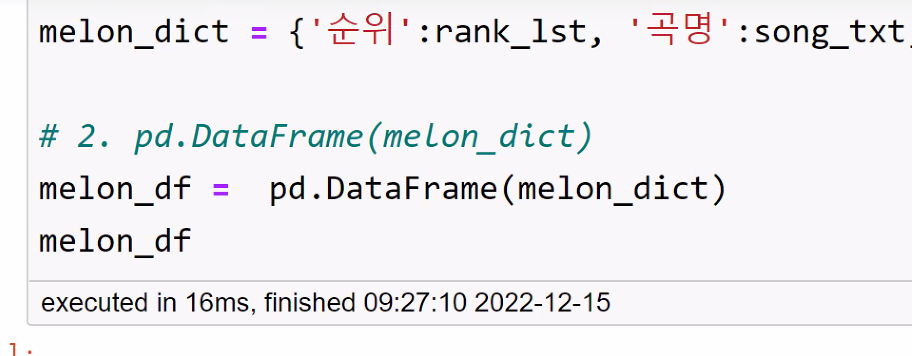m

In [21]:
#1. 딕셔너리 정리
melon_dict = {'순위':rank_lst,'곡명':song_txt,'가수명':singer_txt}

#2. pd.DataFrame()
melon_df = pd.DataFrame(melon_dict)
melon_df2 = melon_df.set_index('순위')
melon_df2

,곡명,가수명
순위,,
1,사건의 지평선,윤하 (YOUNHA)
2,Hype boy,NewJeans
3,마이웨이 (MY WAY) (Prod. R.Tee),"저스디스 (JUSTHIS), R.Tee, 던말릭 (DON MALIK), 허성현 (H..."
4,ANTIFRAGILE,LE SSERAFIM (르세라핌)
5,After LIKE,IVE (아이브)
...,...,...
96,The Astronaut,진
97,눈이 오잖아(Feat.헤이즈),이무진
98,Birthday,Red Velvet (레드벨벳)


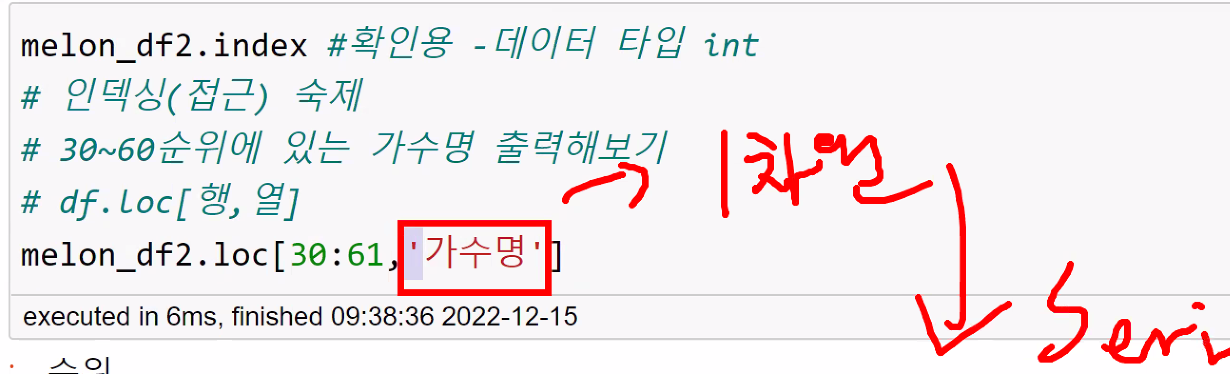

In [28]:
melon_df2.index# 확인용 = 데이터 타입 int
#인덱싱 (접근)숙제
#30~60순위에 있는 가수명 출력해보기
melon_df2["가수명"].iloc[29:60]

순위
30                                                  임영웅
31                                                  임영웅
32                                                  임영웅
33                                        Ariana Grande
34                                            BLACKPINK
35                                                  임영웅
36                                                  #안녕
37                                            BE'O (비오)
38                                                  노윤하
39                                                  성시경
40                              10CM, BIG Naughty (서동현)
41                                                  임영웅
42                                                  EXO
43    이영지, 토이고 (toigo), 제이켠 (J'Kyun), 잠비노 (Jambino),...
44                                              (여자)아이들
45                                                 멜로망스
46                                        Ariana Grande
47                                         WS

In [30]:
#엑셀 저장
melon_df.to_excel('멜론차트Top100.xlsx',index= False)
# csv로 저장> df.to_csv('경로및파일명',index = False)